# Experiments
This notebook contains some of the experiments that were performed for the Master Thesis


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_from_disk, concatenate_datasets
from tatoeba import analysis as tatoeba_analysis
from rude_nmt import analysis as rude_nmt_analysis

## Merge datasets
Due to the large amount of time needed to generate the translations, they are performed for each direction individually. Run the following merge in order to combine the two datasets into one for the remaining analyses if that has not already been done.

In [ ]:
ko_data = load_from_disk("./data/tatoeba_de_ko_labelled")
de_data = load_from_disk("./data/tatoeba_ko_de_labelled")

In [ ]:
remove_cols = [col for col in ko_data.column_names if col in de_data.column_names]
disjunct_de = de_data.remove_columns(column_names=remove_cols)
merged_data = concatenate_datasets([ko_data, disjunct_de], axis=1)

In [ ]:
merged_data.save_to_disk("./data/tatoeba_merged")

## Explore Dataset
First the dataset is explored to obtain some base level statistics

In [2]:
ds = load_from_disk("./data/tatoeba_merged")

In [3]:
print(ds)

Dataset({
    features: ['id', 'source', 'target', 'ko_nmt', 'chrf_ko', 'bleu_ko', 'comet_ko', 'upos_tags_source', 'pos_tags_source', 'ws_tokens_source', 'sent_ids_source', 'de_formality', 'de_formality_map', 'upos_tags_target', 'pos_tags_target', 'ws_tokens_target', 'sent_ids_target', 'upos_tags_ko_nmt', 'pos_tags_ko_nmt', 'ws_tokens_ko_nmt', 'sent_ids_ko_nmt', 'ko_formality', 'ko_formality_map', 'ko_formality_nmt', 'ko_formality_map_nmt', 'de_nmt', 'chrf_de', 'bleu_de', 'comet_de', 'upos_tags_de_nmt', 'pos_tags_de_nmt', 'ws_tokens_de_nmt', 'sent_ids_de_nmt', 'de_formality_nmt', 'de_formality_map_nmt'],
    num_rows: 996350
})


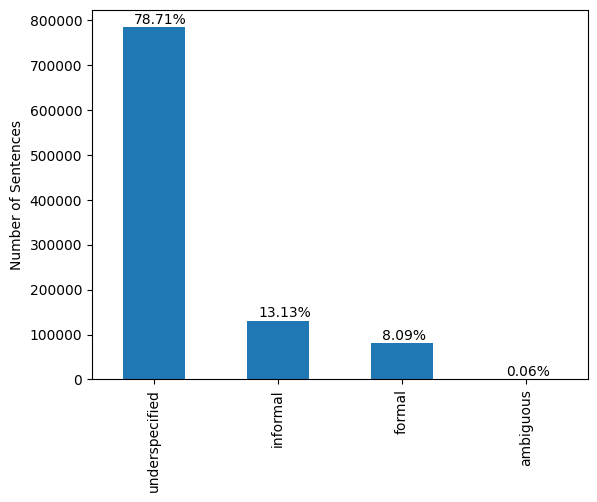

In [5]:
tatoeba_analysis.get_formality_plot(ds, "de_formality")

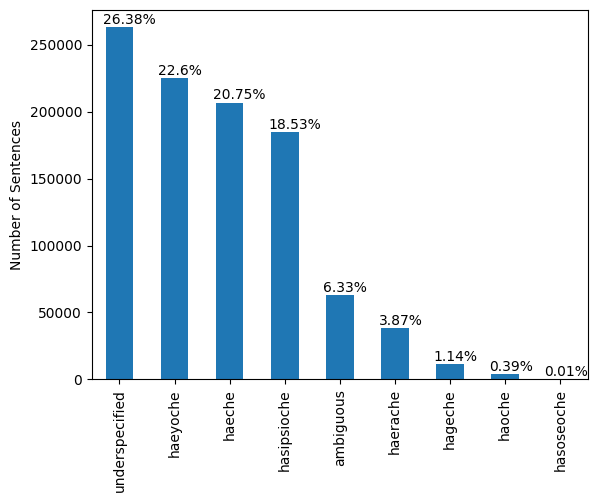

In [6]:
tatoeba_analysis.get_formality_plot(ds, "ko_formality", ax_annotate_vals=(0.3,2500))

remove all ambiguous samples in case this has not been done during the labeling process

In [4]:
ds = ds.filter(lambda ex: not (ex["de_formality"] == "ambiguous" or ex["ko_formality"] == "ambiguous"), num_proc=os.cpu_count())
print(ds)

[d3blocks] >WARNING> Loading cached processed dataset at /Users/lsickert/Repositories/rude-nmt/data/tatoeba_merged/cache-1a05033b836a9247_*_of_00010.arrow


Dataset({
    features: ['id', 'source', 'target', 'ko_nmt', 'chrf_ko', 'bleu_ko', 'comet_ko', 'upos_tags_source', 'pos_tags_source', 'ws_tokens_source', 'sent_ids_source', 'de_formality', 'de_formality_map', 'upos_tags_target', 'pos_tags_target', 'ws_tokens_target', 'sent_ids_target', 'upos_tags_ko_nmt', 'pos_tags_ko_nmt', 'ws_tokens_ko_nmt', 'sent_ids_ko_nmt', 'ko_formality', 'ko_formality_map', 'ko_formality_nmt', 'ko_formality_map_nmt', 'de_nmt', 'chrf_de', 'bleu_de', 'comet_de', 'upos_tags_de_nmt', 'pos_tags_de_nmt', 'ws_tokens_de_nmt', 'sent_ids_de_nmt', 'de_formality_nmt', 'de_formality_map_nmt'],
    num_rows: 932731
})


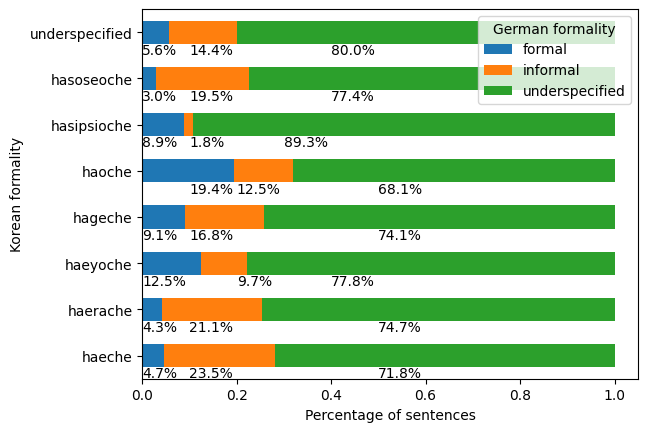

In [7]:
tatoeba_analysis.get_cross_formality_plot(ds, "ko_formality", "de_formality", exclude_vals=["ambiguous"], form_col_desc="Korean formality", cross_col_desc="German formality")

## Analzye the translations
As the next step, the quality of the translations is analyzed.

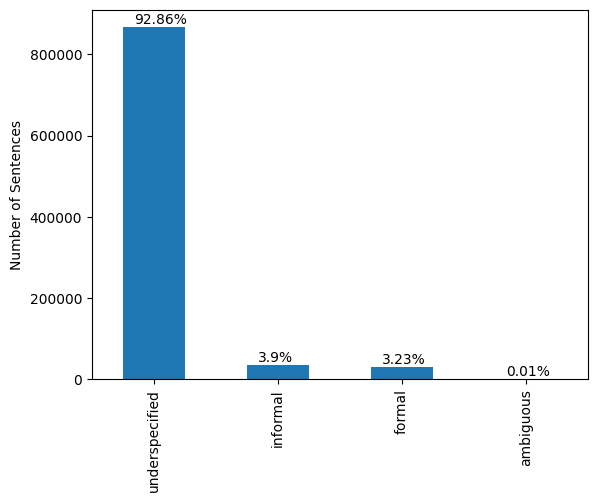

In [9]:
tatoeba_analysis.get_formality_plot(ds, "de_formality_nmt")

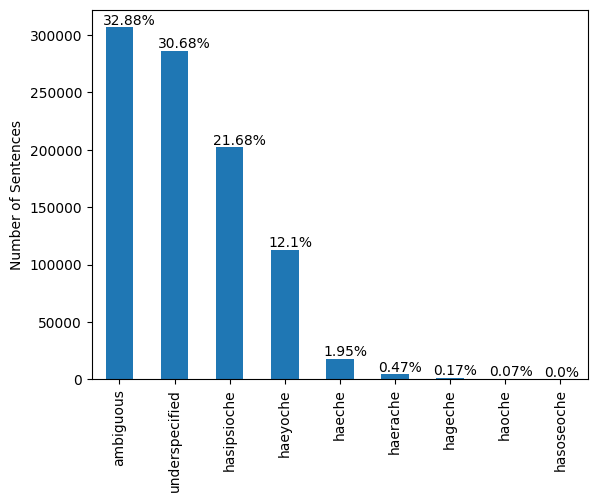

In [10]:
tatoeba_analysis.get_formality_plot(ds, "ko_formality_nmt", ax_annotate_vals=(0.3,2500))

In [5]:
cross_ds = ds.filter(lambda ex: ex["de_formality_nmt"] != "ambiguous", num_proc=os.cpu_count())

Loading cached processed dataset at /Users/lsickert/Repositories/rude-nmt/data/tatoeba_merged/cache-460ee3224f556ca0_*_of_00010.arrow


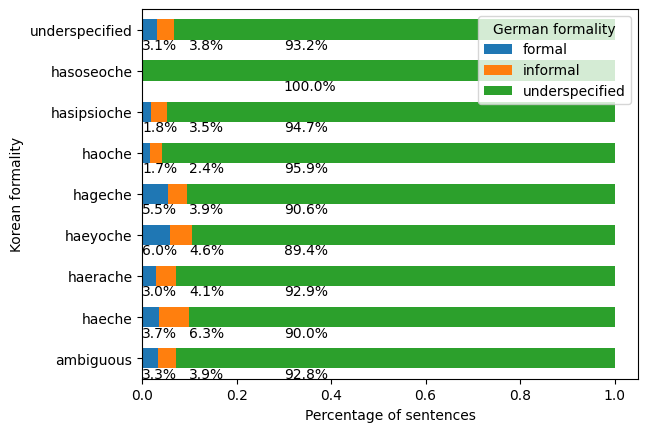

In [6]:
tatoeba_analysis.get_cross_formality_plot(cross_ds, "ko_formality_nmt", "de_formality_nmt", form_col_desc="Korean formality", cross_col_desc="German formality", plot_title="form_distribution_nmt")

In [5]:
# the comet score has to be upscaled to fit into the same range as BLEU and chrF
def upscale_comet(example):
    example["comet_ko"] = example["comet_ko"] * 100
    example["comet_de"] = example["comet_de"] * 100
    return example

In [6]:
ds = ds.map(upscale_comet, num_proc=os.cpu_count())

[d3blocks] >WARNING> Loading cached processed dataset at /Users/lsickert/Repositories/rude-nmt/data/tatoeba_merged/cache-64e9d0e08b38be16_*_of_00010.arrow


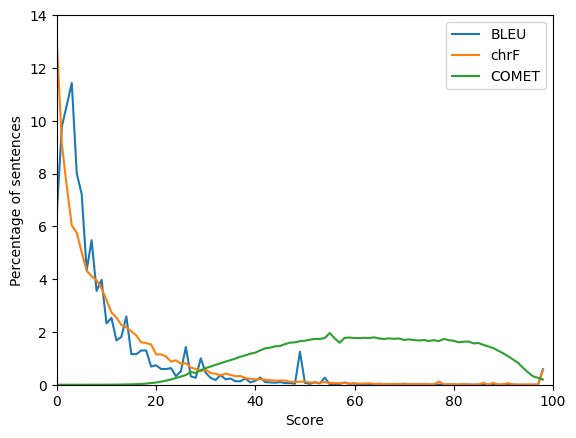

In [7]:
rude_nmt_analysis.plot_translation_metrics(ds, ["bleu_ko", "chrf_ko", "comet_ko"], ["BLEU", "chrF", "COMET"], show=True, plt_name="translation_metrics_ko")

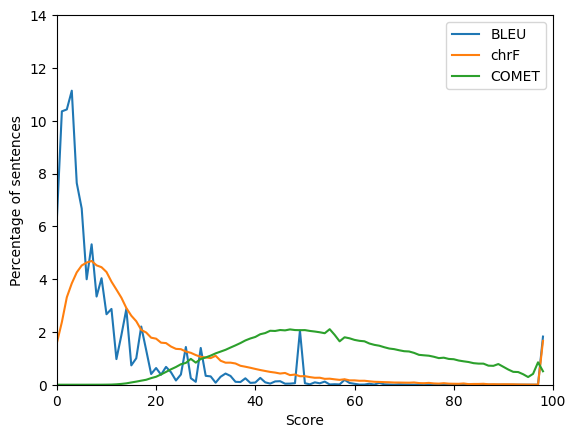

In [8]:
rude_nmt_analysis.plot_translation_metrics(ds, ["bleu_de", "chrf_de", "comet_de"], ["BLEU", "chrF", "COMET"], show=True, plt_name="translation_metrics_de")

In [8]:
rude_nmt_analysis.plot_sankey(ds, "ko_formality", "ko_formality_nmt", show=True, plt_name="sankey_ko_formality")

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Sankey]
[d3blocks] >INFO> filepath is set to [/var/folders/0q/82q5sw8x1mx2jz987fz_sdq40000gn/T/d3blocks/sankey.html]
[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Sankey]
[d3blocks] >INFO> filepath is set to [/Users/lsickert/Repositories/rude-nmt/sankey_ko_formality.html]
[d3blocks] >INFO> Convert to Frame.
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/Users/lsickert/Repositories/rude-nmt/sankey_ko_formality.html]
[d3blocks] >INFO> File not found: [file:////Users/lsickert/Repositories/rude-nmt/sankey_ko_formality.html]
[d3blocks] >INFO> Open browser: file:////Users/lsickert/Repositories/rude-nmt/sankey_ko_formality.html


In [9]:
rude_nmt_analysis.plot_sankey(ds, "de_formality", "de_formality_nmt", show=True, plt_name="sankey_de_formality")

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Sankey]
[d3blocks] >INFO> filepath is set to [/var/folders/0q/82q5sw8x1mx2jz987fz_sdq40000gn/T/d3blocks/sankey.html]
[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Sankey]
[d3blocks] >INFO> filepath is set to [/Users/lsickert/Repositories/rude-nmt/sankey_de_formality.html]
[d3blocks] >INFO> Convert to Frame.
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File not found: [file:////Users/lsickert/Repositories/rude-nmt/sankey_de_formality.html]
[d3blocks] >INFO> Open browser: file:////Users/lsickert/Repositories/rude-nmt/sankey_de_formality.html
